In [133]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/a3426/Desktop/인지개/7_week/student-mat.csv",index_col=0)
df

#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['G1'] = label.fit_transform(df['G1'])
df['G2'] = label.fit_transform(df['G2'])
df['G3'] = label.fit_transform(df['G3'])

df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,2,3,3
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,2,2,3
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,4,5,7
GP,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,12,11,12
GP,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS,M,20,U,LE3,A,2,2,services,services,course,...,5,5,4,4,5,4,11,6,6,6
MS,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,3,11,13,13
MS,M,21,R,GT3,T,1,1,other,other,course,...,5,5,3,3,3,3,3,7,5,4


In [135]:
df['G1'].value_counts()

G1
7     51
5     41
8     39
4     37
9     35
10    33
6     31
11    30
12    24
3     24
13    22
15     8
14     8
2      7
16     3
1      1
0      1
Name: count, dtype: int64

In [136]:
df['G2'].value_counts()

G2
6     50
7     46
9     41
10    37
8     35
12    34
5     32
11    23
4     21
2     15
3     14
13    13
0     13
15    12
14     5
16     3
1      1
Name: count, dtype: int64

In [137]:
df['G3'].value_counts()

G3
7     56
8     47
0     38
12    33
5     32
10    31
9     31
6     28
11    27
13    16
3     15
15    12
4      9
2      7
14     6
16     5
17     1
1      1
Name: count, dtype: int64

In [138]:
df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Text(0.5, 1.0, 'G1')

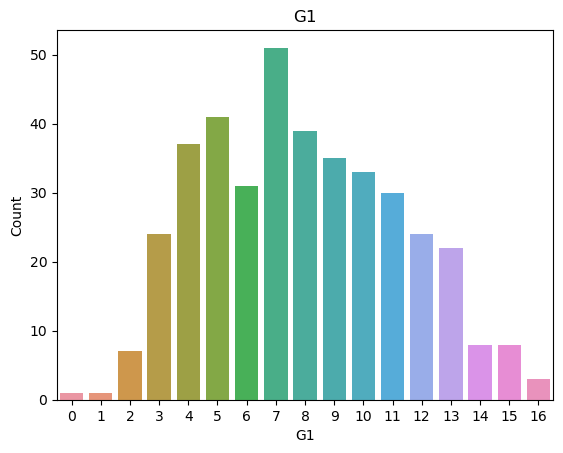

In [139]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x='G1')
plt.ylabel("Count")
plt.title('G1')

Text(0.5, 1.0, 'G2')

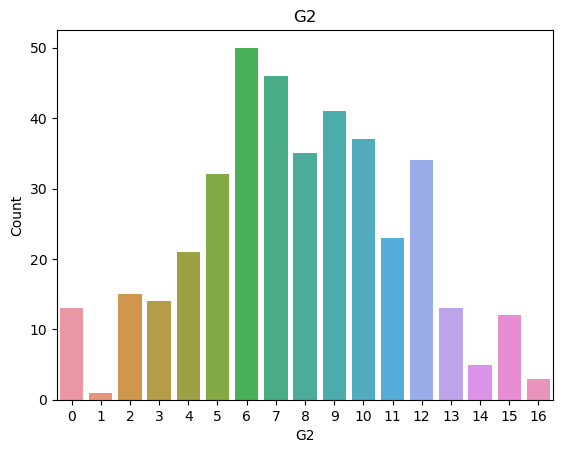

In [140]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x='G2')
plt.ylabel("Count")
plt.title('G2')

Text(0.5, 1.0, 'G3')

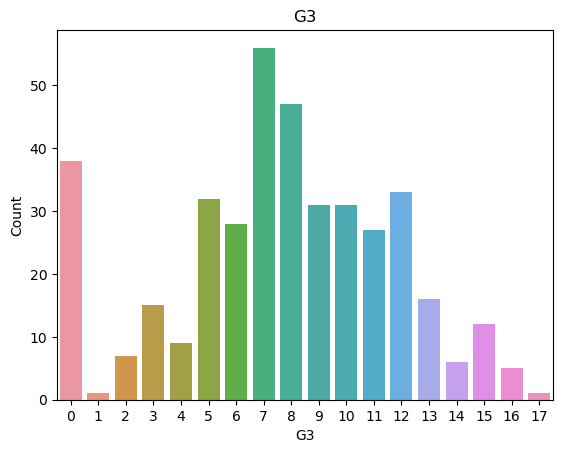

In [141]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x='G3')
plt.ylabel("Count")
plt.title('G3')

In [142]:
y=df['G1']
y.value_counts()

G1
7     51
5     41
8     39
4     37
9     35
10    33
6     31
11    30
12    24
3     24
13    22
15     8
14     8
2      7
16     3
1      1
0      1
Name: count, dtype: int64

In [204]:
X=df.drop(['sex', 'address', 'famsize', 'Pstatus',  'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'G2','G3'], axis=1)
X.head()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
school,,,,,,,,,,,,,
GP,18,4,2,2,0,4,3,4,1,1,3,6,2
GP,17,1,1,2,0,5,3,3,1,1,3,4,2
GP,15,1,1,2,3,4,3,2,2,3,3,10,4
GP,15,4,1,3,0,3,2,2,1,1,5,2,12
GP,16,3,1,2,0,4,3,2,1,2,5,4,3


In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [208]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.23232323232323232
[[ 0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  1  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  1  0  0]]


In [209]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))
print(classification_report(y_test,pred_nn))


--- Neural Network Classifier ---
0.36364
[[0 3 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 2 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 6 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 5 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 2 2 1 0 0 0 0 0]
 [0 0 0 0 0 5 5 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 3 1 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 1 2 2 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 3 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.33      0.29      0.31         7
           4       0.27      0.43      0.33         7
           5       0.67      0.75      0.71         8
           6       1.00      0.11      0.20         9
           7       0.38      0.62      0.47        13
           8       0.42      0.42      0.42        12
           9       0.25      0.14      0.18         7
          10       0.20      0.29  

In [210]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_nn))


--- Decision Tree Classifier ---
0.97980
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.33      0.29      0.31         7
           4       0.27      0.43      0.33         7
           5       0

In [211]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))
print(classification_report(y_test, pred_nn))


--- Neural Network Classifier ---
0.36364
[[0 3 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 2 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 6 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 5 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 8 2 2 1 0 0 0 0 0]
 [0 0 0 0 0 5 5 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 3 1 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 1 2 2 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 3 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.33      0.29      0.31         7
           4       0.27      0.43      0.33         7
           5       0.67      0.75      0.71         8
           6       1.00      0.11      0.20         9
           7       0.38      0.62      0.47        13
           8       0.42      0.42      0.42        12
           9       0.25      0.14      0.18         7
          10       0.20      0.29  

In [215]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['G1'] = label.fit_transform(df['G1'])
df['G2'] = label.fit_transform(df['G2'])
df['G3'] = label.fit_transform(df['G3'])

df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,2,3,3
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,2,2,3
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,4,5,7
GP,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,12,11,12
GP,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS,M,20,U,LE3,A,2,2,services,services,course,...,5,5,4,4,5,4,11,6,6,6
MS,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,3,11,13,13
MS,M,21,R,GT3,T,1,1,other,other,course,...,5,5,3,3,3,3,3,7,5,4


In [264]:
X=df.drop(['sex', 'address', 'famsize', 'Pstatus',  'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'G1','G3'], axis=1)
X.head()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G2
school,,,,,,,,,,,,,
GP,18,4,2,2,0,4,3,4,1,1,3,6,3
GP,17,1,1,2,0,5,3,3,1,1,3,4,2
GP,15,1,1,2,3,4,3,2,2,3,3,10,5
GP,15,4,1,3,0,3,2,2,1,1,5,2,11
GP,16,3,1,2,0,4,3,2,1,2,5,4,7


In [265]:
y.head()

school
GP     2
GP     2
GP     4
GP    12
GP     3
Name: G1, dtype: int64

In [266]:
Y = pd.get_dummies(y).values

In [267]:
X = X.values

In [268]:
X

array([[18,  4,  2, ...,  3,  6,  3],
       [17,  1,  1, ...,  3,  4,  2],
       [15,  1,  1, ...,  3, 10,  5],
       ...,
       [21,  1,  1, ...,  3,  3,  5],
       [18,  3,  3, ...,  5,  0,  9],
       [19,  1,  1, ...,  5,  5,  6]], dtype=int64)

In [269]:
y

school
GP     2
GP     2
GP     4
GP    12
GP     3
      ..
MS     6
MS    11
MS     7
MS     8
MS     5
Name: G1, Length: 395, dtype: int64

In [270]:
Y

array([[False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [271]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [272]:
X_train.shape ,X_test.shape, y_train.shape ,y_test.shape 

((316, 13), (79, 13), (316, 17), (79, 17))

In [273]:
X_train.shape[1]

13

In [279]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))

model.add(Dense(20,activation='relu'))
model.add(Dense(17,activation='softmax'))



model.compile(Adam(learning_rate=0.02),'categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 30)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 17)                  │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,397 (5.46 KB)

 Trainable params: 1,397 (5.46 KB)

 Non-trainable params: 0 (0.00 B)

In [280]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0701 - loss: 3.2728 - val_accuracy: 0.1772 - val_loss: 2.7937
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1207 - loss: 2.4646 - val_accuracy: 0.1266 - val_loss: 2.7843
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1968 - loss: 2.2772 - val_accuracy: 0.1392 - val_loss: 2.7595
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2540 - loss: 2.0722 - val_accuracy: 0.1266 - val_loss: 2.7389
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2317 - loss: 2.1297 - val_accuracy: 0.2278 - val_loss: 2.4936
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2635 - loss: 1.9898 - val_accuracy: 0.1266 - val_loss: 2.5964
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2174 - loss: 2.0562 - val_accuracy: 0.2532 - val_loss: 2.3743
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3385 - loss: 1.8862 - val_accuracy: 0.2278 - val_loss

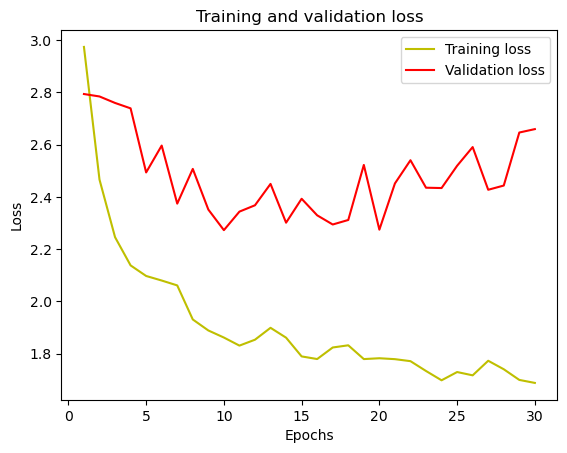

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

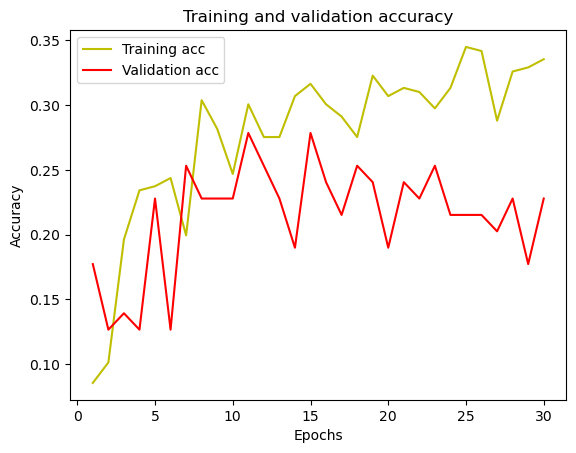

In [282]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [283]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.40      0.29      0.33         7
           4       0.08      0.20      0.12         5
           5       0.29      1.00      0.44         6
           6       0.00      0.00      0.00         6
           7       0.25      0.10      0.14        10
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         6
          11       0.33      0.83      0.48         6
          12       1.00      0.20      0.33         5
          13       0.25      0.33      0.29         3
          14       0.00      0.00      0.00         3
          15       0.50      0.33      0.40         3

    accuracy                           0.23        79
   macro avg       0.22      0.23      0.18        79
weighted avg       0.21      0.23      0.17        79

[[0 0 4 0 0 0 0 0 0 0 0 0